## The fisrt part of this code was written by Hen hajaj.
## At the middle of this Notebook you can see our comment mentioning that from this part forward this is our code.

### Gal Giller - 209264555
### Yuval Bar - 206011355
### David Rapaport - 314659689

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


The Data

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable y).

This dataset provides the customer information. It includes 41188 records and 21 fields.
https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv

In [2]:
data = pd.read_csv('bank.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


# Input variables

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - (numeric)

17 - cons.price.idx: consumer price index - (numeric)

18 - cons.conf.idx: consumer confidence index - (numeric)

19 - euribor3m: euribor 3 month rate - (numeric)

20 - nr.employed: number of employees - (numeric)

# Predict variable (desired target):

y - has the client subscribed a term deposit? (binary: '1','0')

The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories:

In [4]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [5]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

In [6]:
data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

# Data exploration

In [7]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

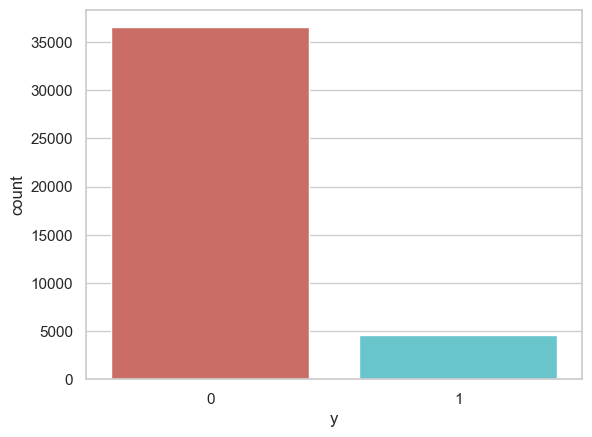

In [8]:
sns.countplot(x='y',data=data, palette='hls')
plt.show()

In [9]:
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


In [10]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


Observations:

The average age of customers who bought the term deposit is higher than that of the customers who didn't. The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale. Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.


In [11]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [12]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [13]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


# Visualizations

Text(0, 0.5, 'Frequency of Purchase')

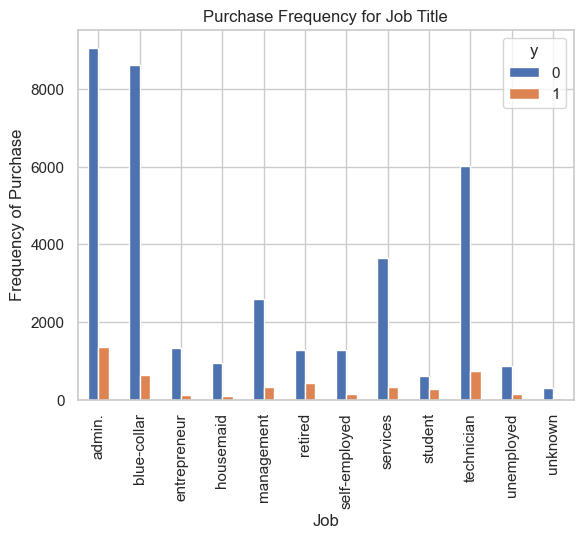

In [14]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Proportion of Customers')

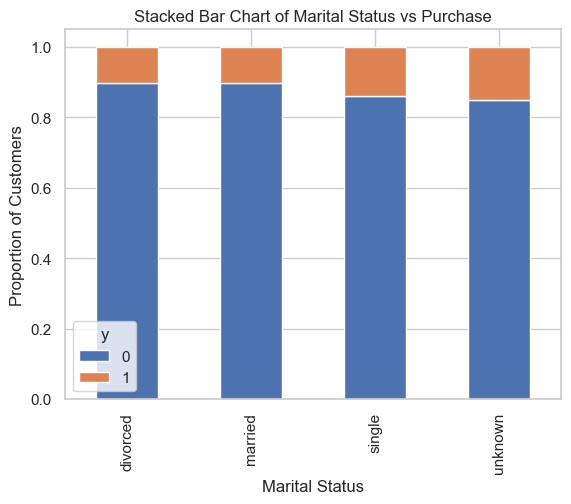

In [15]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Proportion of Customers')

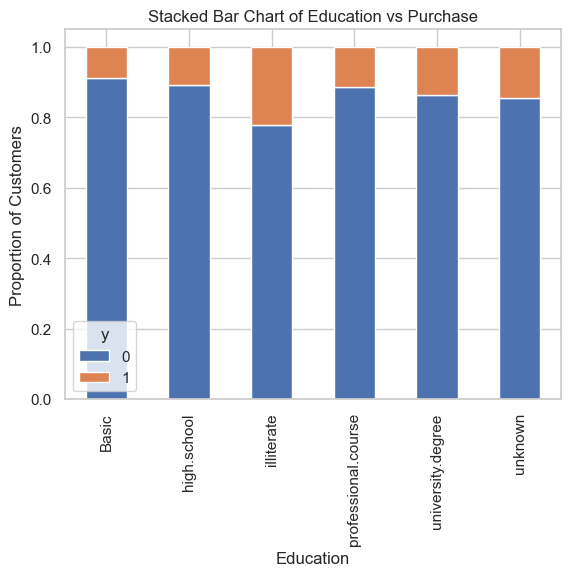

In [16]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Frequency of Purchase')

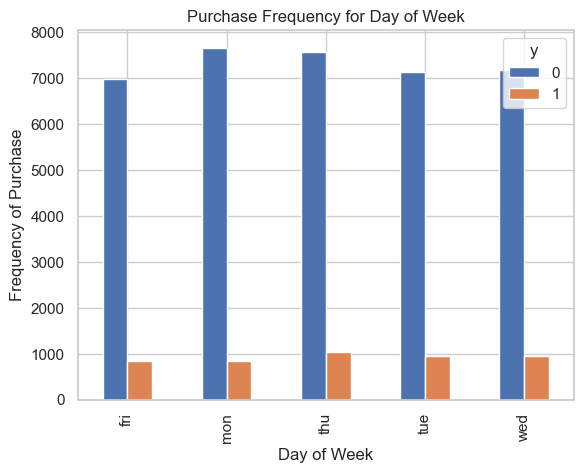

In [17]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Frequency of Purchase')

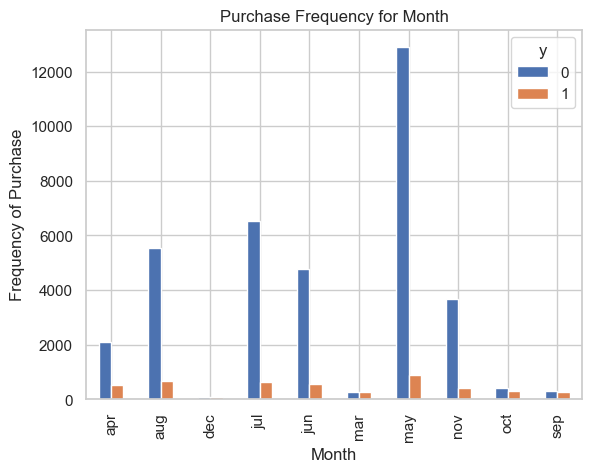

In [18]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Frequency')

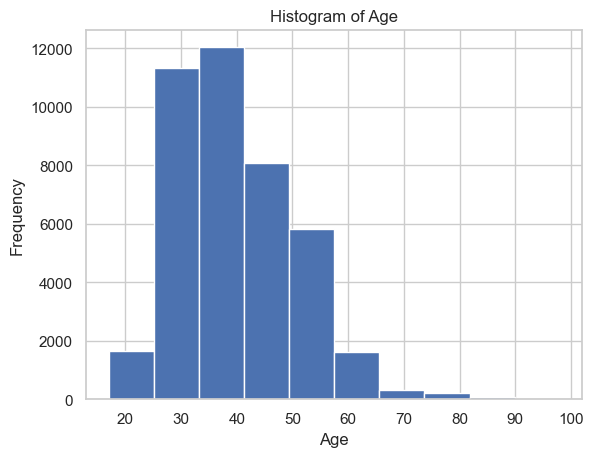

In [19]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [20]:
## convert categorical variables to dummy variables
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
data.drop(cat_vars, axis=1, inplace=True)
data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [21]:
## SMOTE
from imblearn.over_sampling import SMOTE
X = data.loc[:, data.columns != 'y']
y = data.loc[:, data.columns == 'y']
columns = X.columns
os = SMOTE(random_state=0)
os_data_X,os_data_y=os.fit_resample(X, y)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))


length of oversampled data is  73096
Number of no subscription in oversampled data 36548
Number of subscription 36548
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


# From here it is our Code

In [22]:
import numpy as np
import pandas as pd
import math
import statistics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score,KFold, cross_val_predict, GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
import ppscore as pps
from sklearn.metrics import confusion_matrix

## Correlation Coefficient - PPS

In [23]:
pps_scores = pps.matrix(data)

In [24]:
removal_list = []
line = 0

for i in pps_scores["ppscore"]:
    if i > 0.95 and pps_scores["x"][line] != pps_scores["y"][line]:
        removal_list.append(pps_scores["x"][line])
        removal_list.append(pps_scores["y"][line])
    line += 1

print(removal_list)

['previous', 'poutcome_nonexistent', 'emp_var_rate', 'euribor3m', 'emp_var_rate', 'nr_employed', 'emp_var_rate', 'month_dec', 'cons_price_idx', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'cons_price_idx', 'euribor3m', 'cons_price_idx', 'nr_employed', 'cons_price_idx', 'month_apr', 'cons_price_idx', 'month_aug', 'cons_price_idx', 'month_dec', 'cons_price_idx', 'month_jul', 'cons_price_idx', 'month_jun', 'cons_price_idx', 'month_mar', 'cons_price_idx', 'month_may', 'cons_price_idx', 'month_nov', 'cons_price_idx', 'month_oct', 'cons_price_idx', 'month_sep', 'cons_conf_idx', 'emp_var_rate', 'cons_conf_idx', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'cons_conf_idx', 'nr_employed', 'cons_conf_idx', 'month_apr', 'cons_conf_idx', 'month_aug', 'cons_conf_idx', 'month_dec', 'cons_conf_idx', 'month_jul', 'cons_conf_idx', 'month_jun', 'cons_conf_idx', 'month_mar', 'cons_conf_idx', 'month_may', 'cons_conf_idx', 'month_nov', 'cons_conf_idx', 'month_oct', 'cons_conf_idx', 'month_sep', '

In [25]:
dict_removal = {}
for i in removal_list:
    if i in dict_removal:
        dict_removal[i] += 1
    else:
        dict_removal[i] = 1

# Print the resulting dictionary
print(dict_removal)

{'previous': 1, 'poutcome_nonexistent': 1, 'emp_var_rate': 7, 'euribor3m': 8, 'nr_employed': 7, 'month_dec': 4, 'cons_price_idx': 15, 'cons_conf_idx': 15, 'month_apr': 3, 'month_aug': 2, 'month_jul': 2, 'month_jun': 2, 'month_mar': 2, 'month_may': 2, 'month_nov': 3, 'month_oct': 2, 'month_sep': 2, 'default_no': 2, 'default_unknown': 2, 'housing_unknown': 2, 'loan_unknown': 2, 'contact_cellular': 2, 'contact_telephone': 2}


#### we can see that the next variables has strong correlation to several different variables (all variables that has strong correlation with at least 5 different variables):
##### emp_var_rate, emp_var_rate, nr_employed, cons_price_idx, cons_price_idx
#### We decided to drop those variables so it will not influence our model.


In [26]:
data1 = data
data1 = data1.drop(columns='emp_var_rate') 
data1 = data1.drop(columns='euribor3m') 
data1 = data1.drop(columns='nr_employed') 
data1 = data1.drop(columns='cons_price_idx') 
data1 = data1.drop(columns='cons_conf_idx') 
data1

,age,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
41184,31,196,2,999,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
41185,42,62,3,999,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
41186,48,200,2,999,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


<AxesSubplot:>

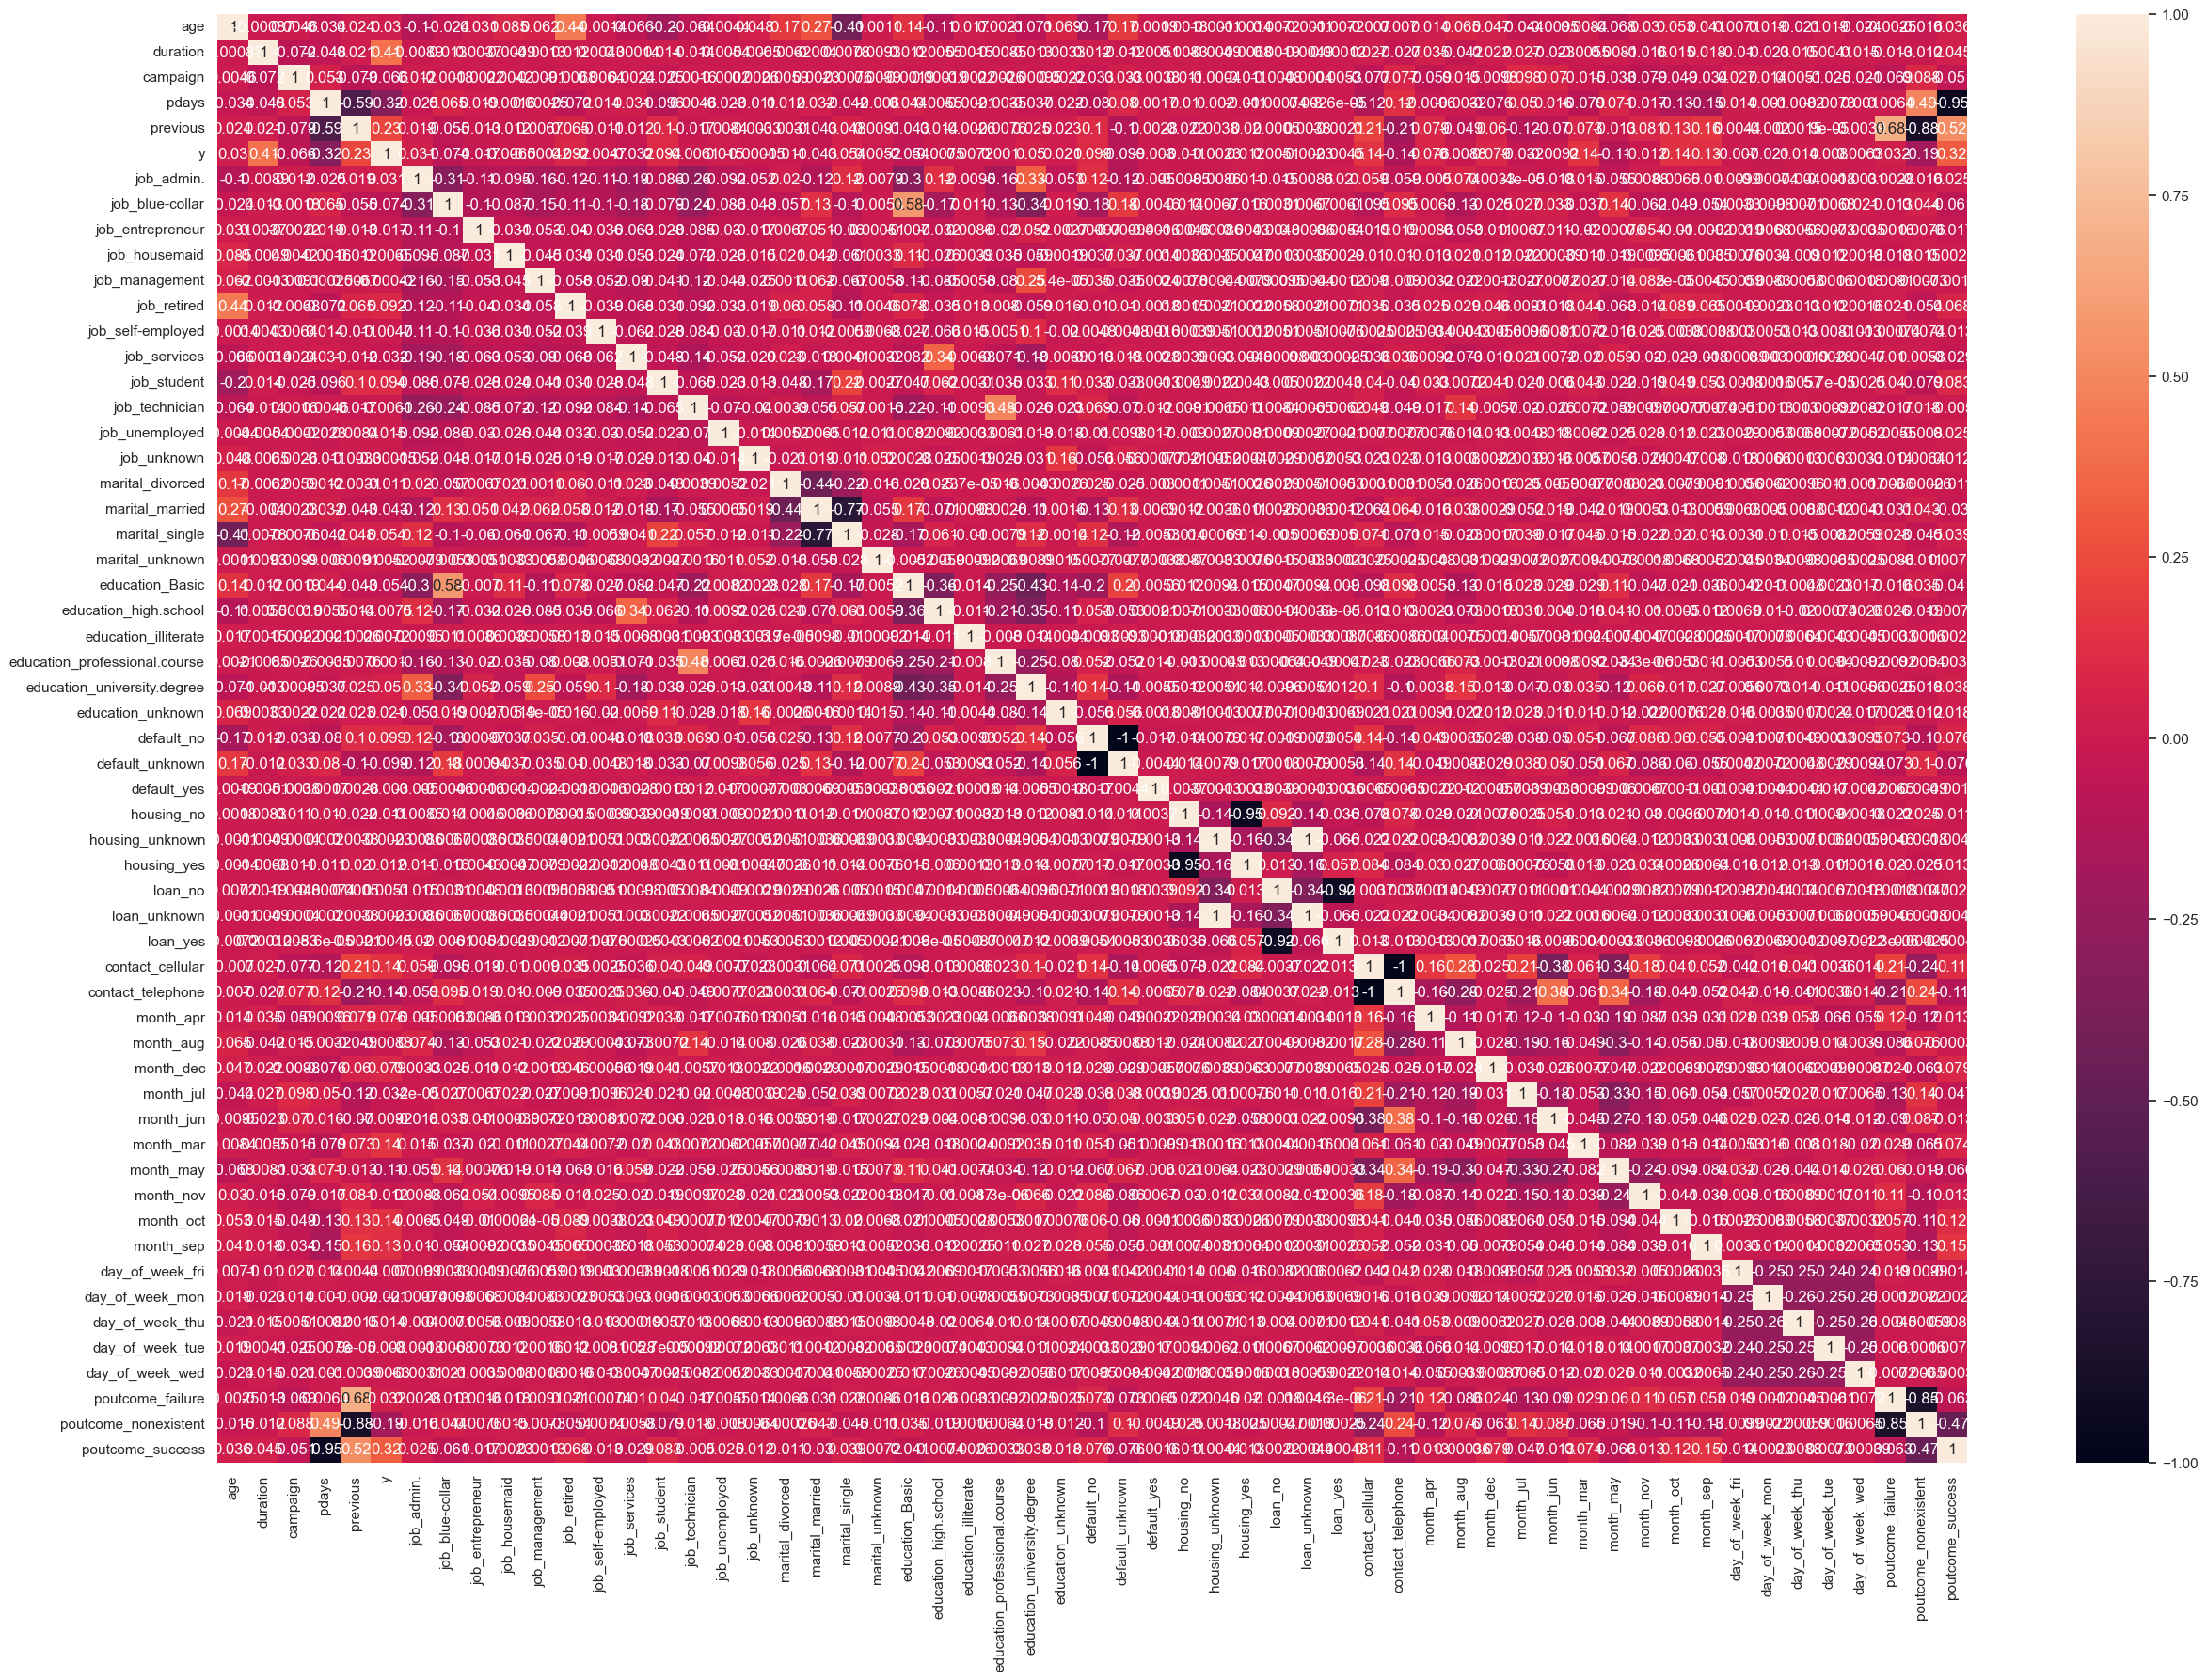

In [27]:
# Correlation Coefficient
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
cor = data1.corr()
plt.figure(figsize = (30,20))
sns.heatmap(cor,annot = True)

## EDA 

#### analyzing the data set y=1 to summarize the main characteristics, using graphs and data visualization

In [28]:
data2 = data1
data2 = data2.loc[data2["y"] == 1]
data2

,age,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
2,28,339,3,6,2,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,55,137,1,3,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
8,36,174,1,3,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
12,55,372,3,999,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
16,35,1034,2,999,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41125,40,365,4,999,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
41129,55,585,2,999,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
41130,28,1111,5,999,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
41172,27,1309,4,999,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


### Weekly EDA

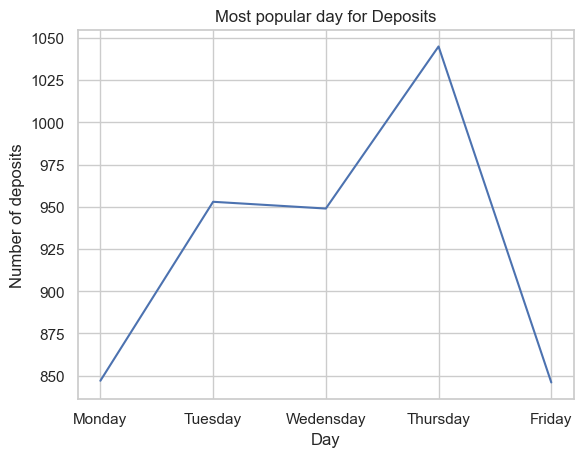

In [29]:
count_monday = len(data2[data2['day_of_week_mon']==1])
count_tuesday = len(data2[data2['day_of_week_tue']==1])
count_wedensday = len(data2[data2['day_of_week_wed']==1])
count_thursday = len(data2[data2['day_of_week_thu']==1])
count_friday = len(data2[data2['day_of_week_fri']==1])
x_axis = ['Monday','Tuesday','Wedensday','Thursday','Friday']
y_axis = [count_monday,count_tuesday,count_wedensday,count_thursday,count_friday]

%matplotlib inline
plt.plot(x_axis,y_axis)
plt.title('Most popular day for Deposits')
plt.xlabel('Day')
plt.ylabel('Number of deposits')
plt.show()

#### we can see from the upper plot that the most popular day for take a deposit is Thursday.
#### We can see a sharp decline between Thursday to Friday.
#### We can conclude that throughout the week starting Monday, there is a constant incline in deposits up until we reach the top most popular day which is Thursday

### Month EDA

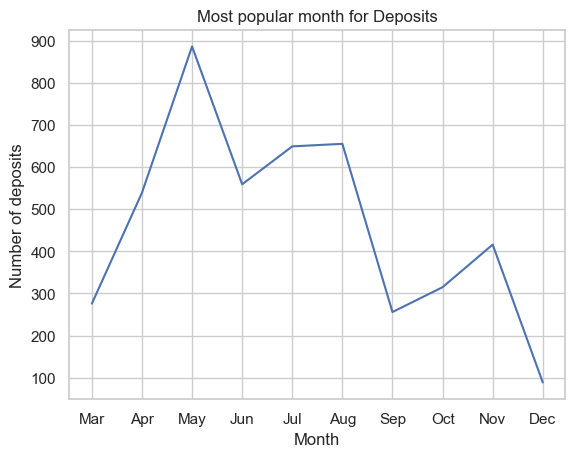

In [30]:
# month_jan = len(data[data['month_jan']==1])
# month_feb = len(data[data['month_feb']==1])
month_mar = len(data2[data2['month_mar']==1])
month_apr = len(data2[data2['month_apr']==1])
month_may = len(data2[data2['month_may']==1])
month_jun = len(data2[data2['month_jun']==1])
month_jul = len(data2[data2['month_jul']==1])
month_aug = len(data2[data2['month_aug']==1])
month_sep = len(data2[data2['month_sep']==1])
month_oct = len(data2[data2['month_oct']==1])
month_nov = len(data2[data2['month_nov']==1])
month_dec = len(data2[data2['month_dec']==1])

x_axis = ['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']##'Jan','Feb',
y_axis = [month_mar,month_apr,month_may,month_jun,month_jul
          ,month_aug,month_sep,month_oct,month_nov,month_dec]##month_jan,month_feb,

%matplotlib inline
plt.plot(x_axis,y_axis)
plt.title('Most popular month for Deposits')
plt.xlabel('Month')
plt.ylabel('Number of deposits')
plt.show()

#### We can see that the most popular month is May.
#### We assume that the reason is the Spring season - when a lot of families are taking a spring vacation and have time for araingments


### Age EDA

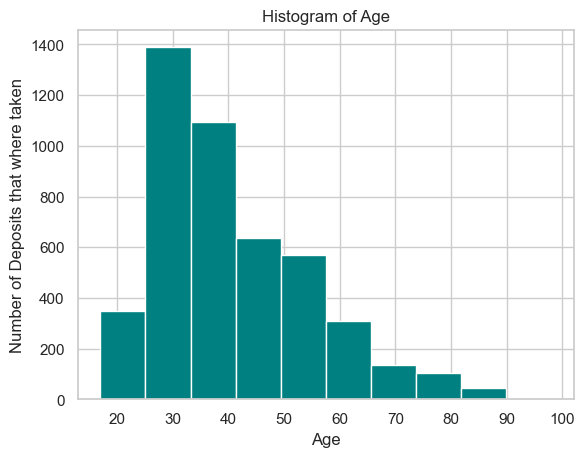

In [31]:
data2.age.hist(color='teal')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Number of Deposits that where taken')
plt.show()

In [32]:
print(min(data2['age']),max(data2['age']))

17 98


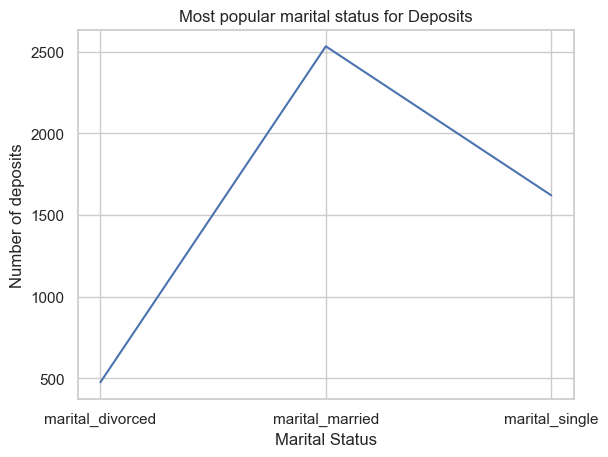

In [33]:
marital_divorced = len(data2[data2['marital_divorced']==1])
marital_married = len(data2[data2['marital_married']==1])
marital_single = len(data2[data2['marital_single']==1])
    
x_axis = ['marital_divorced','marital_married','marital_single']
y_axis = [marital_divorced,marital_married,marital_single]

%matplotlib inline
plt.plot(x_axis,y_axis)
plt.title('Most popular marital status for Deposits')
plt.xlabel('Marital Status')
plt.ylabel('Number of deposits')
plt.show()

#### We can see from the data that the most likely day to take a deposit is age 30-39.
#### The youngest age for taking a deposit is at age 17, and the max is 98

In [34]:
data2.describe()

,age,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
count,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.0,4640.000000,4640.000000,4640.000000,4640.000000,...,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000
mean,40.913147,553.191164,2.051724,792.035560,0.492672,1.0,0.291379,0.137500,0.026724,0.022845,...,0.067888,0.055172,0.182328,0.182543,0.225216,0.205388,0.204526,0.130388,0.676940,0.192672
std,13.837476,401.171871,1.666245,403.407181,0.860344,0.0,0.454447,0.344412,0.161293,0.149425,...,0.251581,0.228341,0.386156,0.386333,0.417769,0.404028,0.403398,0.336766,0.467696,0.394440
min,17.000000,37.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,253.000000,1.000000,999.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,449.000000,2.000000,999.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,50.000000,741.250000,2.000000,999.000000,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,98.000000,4199.000000,23.000000,999.000000,6.000000,1.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### We can see from the data that the avg age for the customers that are taking a deposit is 40.9, it is almost simillar to the median (50%) so we can say that the avg is not influenced from the extremum values

In [35]:
import matplotlib
matplotlib.use('TkAgg')
import gradio as gr
from functools import partial
from sklearn.cluster import (
    AgglomerativeClustering, Birch, DBSCAN, KMeans, MeanShift, OPTICS, SpectralClustering, estimate_bandwidth
)
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [36]:
column1 = data1['age']
column2 = data1['campaign']

# Convert columns to a two-dimensional array
data_array = np.column_stack((column1, column2))

X = data1.drop('y', axis=1)
StandardScaler().fit_transform(X)
labels = data1['y'].values
model = DBSCAN(eps=0.3)
model.fit(X)


DBSCAN(eps=0.3)

In [37]:
from sklearn.manifold import TSNE
X3 = TSNE(n_components=2).fit_transform(data1)

C:\Users\drappapo\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\drappapo\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


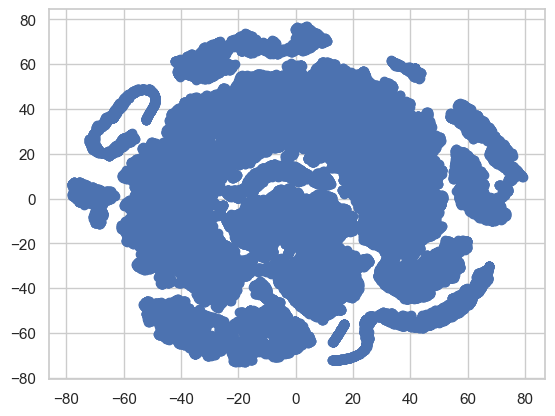

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

A3 = X3[:data.shape[0],:]
B3 = X3[data.shape[0]:,:]
plt.scatter(A3[:,0], A3[:,1])
plt.scatter(B3[:,0], B3[:,1])
plt.show()

In [39]:
plt.style.use('seaborn')
SEED = 0
MAX_CLUSTERS = 10
N_SAMPLES = 1000
N_COLS = 3
FIGSIZE = 7, 7  # does not affect size in webpage
COLORS = [
    'blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'
]
assert len(COLORS) >= MAX_CLUSTERS, "Not enough different colors for all clusters"
np.random.seed(SEED)


def normalize(X):
    return StandardScaler().fit_transform(X)



def get_bank_data(n_clusters):

    data = pd.read_csv('bank.csv', header=0)
    data = data.dropna()
    data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
    data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
    data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])
    cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
    for var in cat_vars:
        cat_list='var'+'_'+var
        cat_list = pd.get_dummies(data[var], prefix=var)
        data1=data.join(cat_list)
        data=data1
    data.drop(cat_vars, axis=1, inplace=True)
    
    #Scale the data
    data_scaled = StandardScaler().fit_transform(data1)
    dataFinal = pd.DataFrame(data_scaled, columns=data1.columns)
    
    column1 = dataFinal['duration']
    column2 = dataFinal['campaign']
    #column3 = data['education_illiterate']
    #column4 = data['education_professional.course']
    #column5 = data['education_university.degree']
    #column3 = data['poutcome_success']
    #column3, column4, column5

    X = data_array = np.column_stack((column1, column2))
    labels = dataFinal['y'].values  

    return X, labels



DATA_MAPPING = {'bank_dataset': get_bank_data}



def get_kmeans(X, labels, n_clusters, **kwargs):
    model = KMeans(init="k-means++", n_clusters=n_clusters, n_init=10, random_state=SEED)
    model.set_params(**kwargs)
    return model.fit(X)


def get_dbscan(X, labels, n_clusters, **kwargs):
    model = DBSCAN(eps=0.365)
    model.set_params(**kwargs)
    return model.fit(X)




MODEL_MAPPING = {
    #'True labels': get_groundtruth_model,
    'KMeans': get_kmeans,
    'DBSCAN': get_dbscan,
}


def plot_clusters(ax, X, labels):
    set_clusters = set(labels)
    set_clusters.discard(-1)  # -1 signifiies outliers, which we plot separately
    for label, color in zip(sorted(set_clusters), COLORS):
        idx = labels == label
        if not sum(idx):
            continue
        ax.scatter(X[idx, 0], X[idx, 1], color=color)

    # show outliers (if any)
    idx = labels == -1
    if sum(idx):
        ax.scatter(X[idx, 0], X[idx, 1], c='k', marker='x')

    ax.grid(None)
    ax.set_xticks([])
    ax.set_yticks([])
    return ax


def cluster(dataset: str, n_clusters: int, clustering_algorithm: str):
    if isinstance(n_clusters, dict):
        n_clusters = n_clusters['value']
    else:
        n_clusters = int(n_clusters)

    X, labels = DATA_MAPPING[dataset](n_clusters)
    model = MODEL_MAPPING[clustering_algorithm](X, labels, n_clusters=n_clusters)
    if hasattr(model, "labels_"):
        y_pred = model.labels_.astype(int)
    else:
        y_pred = model.predict(X)

    fig, ax = plt.subplots(figsize=FIGSIZE)

    plot_clusters(ax, X, y_pred)
    ax.set_title(clustering_algorithm, fontsize=16)

    return fig


title = "Clustering with Scikit-learn"
description = (
    "This example shows how different clustering algorithms work. Simply pick "
    "the dataset and the number of clusters to see how the clustering algorithms work. "
    "Colored circles are (predicted) labels and black x are outliers."
)


def iter_grid(n_rows, n_cols):
    # create a grid using gradio Block
    for _ in range(n_rows):
        with gr.Row():
            for _ in range(n_cols):
                with gr.Column():
                    yield

with gr.Blocks(title=title) as demo:
    gr.HTML(f"{title}")
    gr.Markdown(description)

    input_models = list(MODEL_MAPPING)
    input_data = gr.Radio(
        list(DATA_MAPPING),
        value="regular",
        label="dataset"
    )
    input_n_clusters = gr.Slider(
        minimum=1,
        maximum=MAX_CLUSTERS,
        value=4,
        step=1,
        label='Number of clusters'
    )
    n_rows = int(math.ceil(len(input_models) / N_COLS))
    counter = 0
    for _ in iter_grid(n_rows, N_COLS):
        if counter >= len(input_models):
            break

        input_model = input_models[counter]
        plot = gr.Plot(label=input_model)
        fn = partial(cluster, clustering_algorithm=input_model)
        input_data.change(fn=fn, inputs=[input_data, input_n_clusters], outputs=plot)
        input_n_clusters.change(fn=fn, inputs=[input_data, input_n_clusters], outputs=plot)
        counter += 1

demo.launch()

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


## All ML Methods

In [40]:
from imblearn.over_sampling import SMOTE
X = data.loc[:, data.columns != 'y']
y = data.loc[:, data.columns == 'y']
columns = X.columns
os = SMOTE(random_state=0)
os_data_X,os_data_y=os.fit_resample(X, y)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.3, random_state=0)

##Decission Tree Classifaier
pred_tree = DecisionTreeClassifier().fit(X_train, y_train).predict(X_test)

##Random Forest Classifaier
pred_forest = RandomForestClassifier().fit(X_train, y_train).predict(X_test).round()

##Logistic Reg Classifier
pred_clf = LogisticRegression().fit(X_train, y_train).predict(X_test)

##SVM
pred_SVM = SVC(kernel='linear').fit(X_train, y_train).predict(X_test)

##KNN
pred_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2).fit(X_train, y_train).predict(X_test)

##neural_network
pred_neural_network = MLPClassifier(random_state=1, max_iter=500).fit(X_train, y_train).predict(X_test)

#Best ML Model
pred_list=[accuracy_score(y_test, pred_tree)
                    ,accuracy_score(y_test, pred_forest)
                    ,accuracy_score(y_test, pred_clf)
                    ,accuracy_score(y_test, pred_SVM)
                    ,accuracy_score(y_test, pred_KNN)
                    ,accuracy_score(y_test, pred_neural_network)]

pred_list_max = pred_list.index(max(pred_list))

if pred_list_max == 0:
    pred = pred_tree
    print('pred_tree')
elif pred_list_max == 1:
    pred = pred_forest
    print('pred_forest')
elif pred_list_max == 2:
    pred = pred_clf
    print('pred_clf')
elif pred_list_max == 3:
    pred = pred_SVM
    print('pred_SVM')
elif pred_list_max == 4:
    pred = pred_KNN
    print('pred_KNN')
else:
    pred = pred_neural_network
    print('pred_neural_network')
    
print(classification_report(y_test, pred))

C:\Users\drappapo\AppData\Local\Temp\1\ipykernel_22916\3307592429.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  pred_forest = RandomForestClassifier().fit(X_train, y_train).predict(X_test).round()
C:\Users\drappapo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\drappapo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-l

pred_forest
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     10964
           1       0.96      0.95      0.95     10965

    accuracy                           0.95     21929
   macro avg       0.95      0.95      0.95     21929
weighted avg       0.95      0.95      0.95     21929



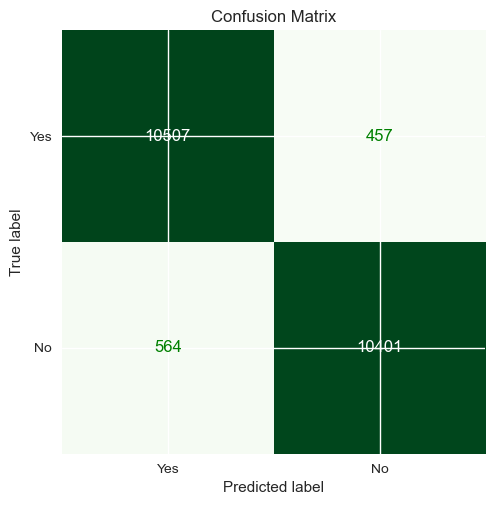

In [43]:
%matplotlib inline
cm = confusion_matrix(y_test, pred)
classes = ['Yes', 'No']

# Plot
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)

# Show all ticks and label them
ax.set(
    xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       xlabel='Predicted label',
       ylabel='True label',
       title='Confusion Matrix'
      )

# Create text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, str(cm[i, j]), ha='center', va='center',
                color='white' if cm[i, j] > cm.max() / 2 else 'green')

plt.show()

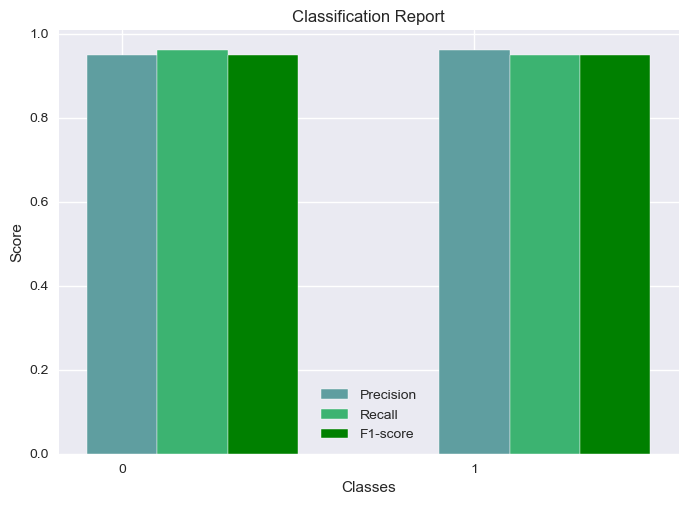

In [44]:
sampleClassificationReport = classification_report(y_test, pred)
lines = sampleClassificationReport.split('\n')
data = []
for line in lines[2:-5]:
    row = line.split()
    if row:
        data.append(row)

classes = []
precision = []
recall = []
f1_score = []
support = []

for row in data:
    classes.append(row[0])
    precision.append(float(row[1]))
    recall.append(float(row[2]))
    f1_score.append(float(row[3]))
    support.append(int(row[4]))

# Plotting the classification report
x = np.arange(len(classes))

fig, ax = plt.subplots()
ax.bar(x, precision, width=0.2, label='Precision',color = 'cadetblue')
ax.bar(x + 0.2, recall, width=0.2, label='Recall',color = 'mediumseagreen')
ax.bar(x + 0.4, f1_score, width=0.2, label='F1-score',color = 'green')

ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.set_ylabel('Score')
ax.set_xlabel('Classes')
ax.set_title('Classification Report')
ax.legend()

plt.show()

#### We can see from the results that the measures of the classification are high! 
#### It means we can use random forest model to predict if an exsiting customer will take a deposit or not
#### Now, we will take the customres that did took a deposite and start analize them to eancrease this results